<a href="https://colab.research.google.com/github/FelipeAdrian/Logistic-regression---Find-beta-s/blob/main/Classificador_bin%C3%A1rio_Regress%C3%A3o_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random

Construamos uma tabela de estudo. Seja ela

\begin{equation}
\begin{array}{|c|c|c|}
\hline
Premium & Renda & Anos \\
\hline
0 & 18.90256 & 4\\
\hline
1 & 38.66267 & 7 \\
\hline
1 & 82.16108 & 4 \\
\hline
1 & 22.34817 & 8 \\
\hline
1 & 36.13398 & 9 \\
\hline
0 & 52.61761 & 2 \\
\hline
\vdots & \vdots & \vdots \\
\hline
\end{array}
\hspace{2cm} \text{Exemplo de tabela}
\end{equation}

In [23]:
tamanho_lista = 400
intervalo_a = [0, 1]
intervalo_b_min = 15.0
intervalo_b_max = 70.0
intervalo_c = range(1, 21)

# Cria a lista de valores aleatorios em intervalos determinados de

# Premium = 0 ou 1
# Renda entre 15 e 70
# Anos entre 1 e 20

table = np.array(
    [[random.choice(intervalo_a), round(random.uniform(intervalo_b_min, intervalo_b_max), 4), random.choice(intervalo_c)]
    for _ in range(tamanho_lista)]
)

## Métodos

## Minimização linear


Comecemos com método padrão e vamos pouco a pouco aumentando nivel de teoria para mostrarmos a regressão logistica. Seja a função de teste inicial:

\begin{equation}
f(\beta) = \sum_{i=1}^{n} (y_i + (\beta_0 + \beta_1 (renda)_i + \beta_2 (anos)_i))^{2}
\end{equation}

In [24]:
def mult_linear_reg(beta, table):
    y = table[:, 0]
    renda = table[:, 1]
    anos = table[:, 2]
    termo = y - beta[0] - beta[1] * renda - beta[2] * anos
    func = np.sum(termo**2)
    return func

# Valores iniciais de beta
initial_beta = np.array([0, 0, 0])

# Minimiza a função mult_linear_reg
result = minimize(mult_linear_reg, initial_beta, args=(table,), method='Nelder-Mead')

# Obtém os valores ótimos de beta
optimal_beta = result.x

print("Optimal beta values:", optimal_beta)



Optimal beta values: [ 0.63608056 -0.00226228 -0.00539251]


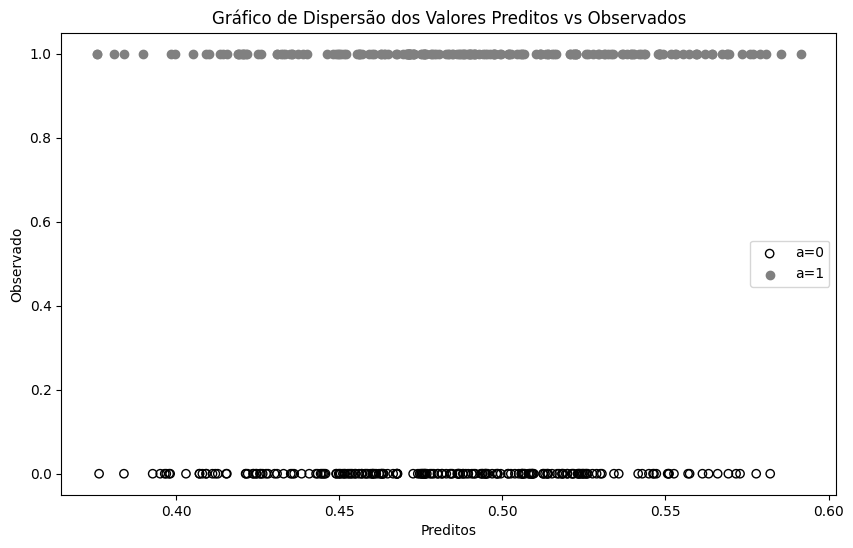

In [25]:

def calcular_preditos(beta, renda, anos):
    return beta[0] + beta[1]*renda + beta[2]*anos

dados = {
    'Premium': table[:, 0],
    'Renda': table[:, 1],
    'Anos': table[:, 2]
}

# Calculando os valores preditos
preditos = calcular_preditos(optimal_beta, dados['Renda'], dados['Anos'])



plt.figure(figsize=(10, 6))

# Pontos com a = 0 (círculos brancos com borda preta)
mask_0 = dados['Premium'] == 0
plt.scatter(preditos[mask_0], dados['Premium'][mask_0], edgecolors='black', facecolors='none', label='a=0')

# Pontos com a = 1 (bolinhas cinza)
mask_1 = dados['Premium'] == 1
plt.scatter(preditos[mask_1], dados['Premium'][mask_1], color='gray', label='a=1')

# Configurações do gráfico
plt.xlabel('Preditos')
plt.ylabel('Observado')
plt.legend()
plt.title('Gráfico de Dispersão dos Valores Preditos vs Observados')
plt.show()

Acima, portanto, estão os ajustes do método vigente.


# Regressão logística

Vamos então atacar o mesmo problema, usando agora como função de ajuste a função logisitica

\begin{equation}
  f(x) = \frac{1}{1 + \exp(-\beta x_i)}
\end{equation}

onde $\beta = \{\beta_0, \beta_1, \beta_2 \}$ neste caso. e $x_i = \{x_1=\text{rendas}, x_2 = \text{anos} \}$.


Como predito no relatório, a função log de verossimilhança é:

\begin{equation}
  \mathbb{L}(\beta) = \log(L(\beta)) = \sum_{i=1}^{n} \left [\ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right ]
\end{equation}

Escrevendo a função logistica já dentro da log de verossimilhança:


[ 0.54865846 -0.00911999 -0.0217505 ]


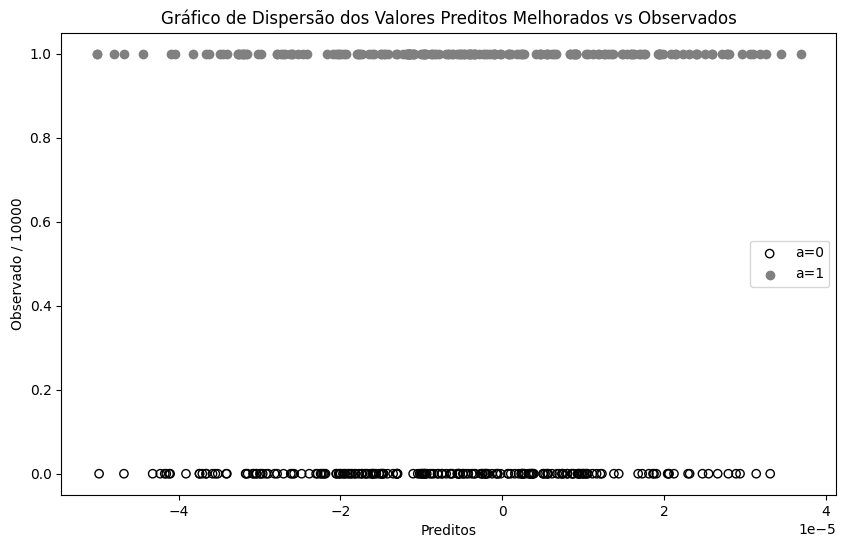

In [26]:
def logistic_func(beta, y, renda, anos):
    fator = beta[0] + beta[1]*renda + beta[2]*anos
    p = 1 / (1 + np.exp(-fator))
    log_likelihood = np.sum(y * np.log(p) + (1-y) * np.log(1-p))
    return -log_likelihood


fit_logit_ols = minimize(logistic_func, initial_beta, args=(dados['Premium'], dados['Renda'], dados['Anos']), method='BFGS', options={'disp': False})
optimal_beta_melhorado = fit_logit_ols.x


optimal_beta_melhorado = fit_logit_ols.x

print(optimal_beta_melhorado)


# Calculando os valores preditos
preditos_melhorado = calcular_preditos(optimal_beta_melhorado, dados['Renda'], dados['Anos'])


# Calculando os valores preditos
plt.figure(figsize=(10, 6))

# Pontos com a = 0 (círculos brancos com borda preta)
mask_0 = dados['Premium'] == 0
plt.scatter(preditos_melhorado[mask_0] / 10000, dados['Premium'][mask_0], edgecolors='black', facecolors='none', label='a=0')

# Pontos com a = 1 (bolinhas cinza)
mask_1 = dados['Premium'] == 1
plt.scatter(preditos_melhorado[mask_1] / 10000, dados['Premium'][mask_1], color='gray', label='a=1')

# Configurações do gráfico
plt.xlabel('Preditos')
plt.ylabel('Observado / 10000')
plt.legend()
plt.title('Gráfico de Dispersão dos Valores Preditos Melhorados vs Observados')
plt.show()

# Aprimorando ainda mais o método de regressão logística

Até o momento nós utilizamos o para otimizar a função o método de BFGS ou Quasi-Newton (vide melhor em https://www.researchgate.net/publication/322842755_Metodo_BFGS_estructurado_para_la_estimacion_de_maxima_verosimilitud). Agora construíremos nosso próprio otimizador utilizando o algoritmo de Newton que é o mais eficiente em termos de número de iterações para a convergência.

O motivo deste troca neste momento é que o cálculo feito anteriormente usando Nelder-mead não dependa das derivadas da função a ser otimizada, o que é diferente do método de Newton.

Assim, o método de Newton é dado por

\begin{equation}
  \beta^{(i+1)} = \beta^{(i)} - \textit{J} (\beta^{(i)})^{-1} l'(\beta^{(i)})
\end{equation}

onde $J(\beta^{(i)})$ é uma matri\ hessiana de dimensão $3 \times 3$ e $l'(\beta^{(i)})$ é o vetor gradiente de dimensão $3 \times 1$. Precisamos de um vetor inicial $\beta^{(1)}$ para o vetor de parâmetros $3 \times 1$ no caos do nosso exemplo. O vetror gradiente é dado por

\begin{equation}
  l'(\beta^{(i)}) = \left (\ \frac{\partial l'(\beta)}{\partial \beta_0}, \frac{\partial l'(\beta)}{\partial \beta_1}, \frac{\partial l'(\beta)}{\partial \beta_2} \right )
\end{equation}


Para obter cada uma das entradas do vetor gradiente, faremos as derivadas pela regra da cadeia, isto é:

\begin{equation}
  \frac{\partial l'(\beta)}{\partial \beta_j} = \frac{\partial l'(\beta)}{\partial p} \frac{\partial p}{\partial \eta} \frac{\partial \eta }{\partial \beta_j}
\end{equation}

onde definimos no momento $\eta = \beta_0 + \beta_1 * \text{renda}_i + \beta_2 * \text{anos}_i$.


Realizando os cálculos

\begin{equation}
 \begin{array}{c}
    \frac{\partial l'(\beta)}{\partial p} = \frac{\partial }{\partial p} \left (\ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right ) = \frac{y_i - p_i}{p_i (1 - p_i)}    \\ \\
    \frac{\partial p}{\partial \eta} = \frac{\partial}{\partial \eta} \left (\ \frac{1}{1 + e^{-\eta}} \right) = p_i (1-p_i) \\ \\
    \frac{\partial \eta}{\partial \beta_j} = \left (\ \frac{\partial \eta}{\partial \beta_0}), \frac{\partial \eta}{\partial \beta_1}, \frac{\partial \eta}{\partial \beta_2} \right ) =
    (1, \text{renda}_i, \text{anos}_i ) \\
  \end{array}
\end{equation}


e a Hessiana, de forma semelhante

\begin{equation}
  J(\beta) = - \begin{bmatrix}
  p_i(1-p_i) & p_i(1-p_i)*\text{rendas}_i & p_i(1-p_i)*\text{anos}_i \\
  p_i(1-p_i) *\text{rendas}_i & p_i(1-p_i)*\text{rendas}_i^{2} & p_i(1-p_i)*\text{anos}*\text{rendas}_i \\
  p_i(1-p_i)*\text{anos}_i & (1-p_i)*\text{anos}*\text{rendas}_i & p_i(1-p_i)*\text{anos}_i^{2} \\
  \end{bmatrix}
\end{equation}

In [27]:
def gradiente(beta,renda,anos):
  y = dados['Premium']
  eta = beta[0] + beta[1]*renda + beta[2]*anos
  p = (1)/(1 + np.exp(-eta))
  db0 = np.sum(y-p)
  db1 = np.sum((y-p)*renda)
  db2 = np.sum((y-p)*anos)
  return np.array([db0, db1, db2])

def Hessiano(beta, renda, anos, lambda_reg=1e-6):
    y = dados['Premium']
    J = np.full((3, 3), np.nan)
    eta = beta[0] + beta[1]*renda + beta[2]*anos
    p = 1 / (1 + np.exp(-eta))
    J[0, 0] = np.sum(p * (1 - p))
    J[0, 1] = np.sum(p * (1 - p) * renda)
    J[0, 2] = np.sum(p * (1 - p) * anos)
    J[1, 0] = J[0, 1]
    J[1, 1] = np.sum(p * (1 - p) * renda * renda) + lambda_reg
    J[1, 2] = np.sum(p * (1 - p) * renda * anos)
    J[2, 0] = J[0, 2]
    J[2, 1] = J[1, 2]
    J[2, 2] = np.sum(p * (1 - p) * anos * anos) + lambda_reg
    return - J

def Newton_Method(gradiente, Hessiano, beta=[0, 0, 0], tol=1e-4, max_iter=100):
    renda = dados['Renda']
    anos = dados['Anos']
    sol = np.zeros((len(beta), max_iter + 1))
    sol[:, 0] = beta
    for lin in range(max_iter):
        J = Hessiano(sol[:, lin], renda, anos)
        if np.linalg.det(J) < 1e-10:
            # print("Matriz Hessiana é singular ou quase singular. Usando pseudo-inversa.")
            inversa_J = np.linalg.pinv(J)
        else:
            inversa_J = np.linalg.inv(J)
        grad = gradiente(sol[:, lin], renda, anos)
        sol[:, lin + 1] = sol[:, lin] - np.dot(inversa_J, grad)

        # print(f"Iteração {lin+1}:")
        # print(f"  beta: {sol[:, lin]}")
        # print(f"  gradiente: {grad}")
        # print(f"  Hessiano: \n{J}")
        # print(f"  Atualização: {sol[:, lin + 1]}")

        if np.sum(np.abs(sol[:, lin + 1] - sol[:, lin])) < tol:
            # print("Convergência atingida.")
            break

    beta_otimizado = sol[:, lin + 1]
    # print("Beta otimizado:", beta_otimizado)
    return sol,beta_otimizado

resultado_newton_met = Newton_Method(gradiente, Hessiano)
beta_newton_met = resultado_newton_met[1]
print(beta_newton_met)

# O resultado final serão os valores otimizados de beta






[ 0.54865566 -0.00911993 -0.02175047]


Não encontrando **ainda** como estimar o erro estimado dos valores de $\beta_k$

# Resultados gerais

---



A depender da escolha do tamanho da sua lista de entradas e da quantidade de variaveis, os valores de $\beta_k$ claramente serão diferentes, mas note que temos proximamente bem os valores de $\beta_k$ achados com o método de **minimização linear**, **função logistica** pelo método de **Nelder-Mead** e método de **Newton** quando o tamanho das linhas da tabela aumenta.